In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('darkgrid')
import random 
from statsmodels.tsa.stattools import pacf , acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess, arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.stattools import adfuller

In [84]:
np.random.seed(1410)

In [85]:
data = pd.read_csv('w.csv')
data

,X
0,-5.426634
1,-6.881817
2,-0.386337
3,1.278708
4,9.995283
...,...
2552,-23.547124
2553,-38.422111
2554,-25.483648
2555,-18.703719


In [86]:
model = ARIMA(data['X'],order=(2,0,2)).fit()

c:\Users\mkarc\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [87]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      X   No. Observations:                 2557
Model:                 ARIMA(2, 0, 2)   Log Likelihood              -10277.483
Date:                Tue, 07 Feb 2023   AIC                          20566.966
Time:                        17:12:55   BIC                          20602.046
Sample:                             0   HQIC                         20579.687
                               - 2557                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4262      1.687     -0.253      0.801      -3.732       2.880
ar.L1          1.5957      0.040     40.382      0.000       1.518       1.673
ar.L2         -0.6069      0.035    -17.324      0.000      -0.676      -0.538
ma.L1         -0.8447      0.042    -20.309      0.000      -0.926      -0.763
ma.L2         -0.0847      0.026     -3.291      0.001      -0.135      -0.034
sigma2       181.3597      4.085     44.398      0.000     173.353     189.366
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               144.70
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                             0.12
Prob(H) (two-sided):                  0.09   Kurtosis:                         4.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
const, phi1, phi2 , theta1, theta2, sigma2 =  model.params
samples = arma_generate_sample(np.array([1,-phi1, -phi2]), np.array([1, theta1, theta2]),(len(data),1000),np.sqrt(sigma2)) + const
samples

array([[ 13.57480873,  14.78673038,   1.46636377, ...,  10.63895189,
         25.46151753,  11.15730319],
       [ -0.3888557 ,  23.09937743,  -4.65947238, ..., -21.52855538,
         35.35845886,  11.56069369],
       [  8.95899308,  35.8992646 ,   4.01645805, ...,   4.56726244,
         37.2234137 ,  19.3828416 ],
       ...,
       [-12.52352032,  16.23829224,  -2.87978728, ...,  -7.63808078,
         19.8666056 , -29.86768462],
       [-18.43861595, -12.98283618,   3.18344656, ..., -23.17702583,
          7.93439238, -18.5373442 ],
       [-25.56939722,  -8.20187463, -17.50256789, ..., -16.00535809,
        -12.10586415, -12.12166867]])

In [118]:
sigma2

181.35971631951247

: 

In [89]:
pacf_values = np.apply_along_axis(pacf,0,samples)
up_quantail_pacf =np.apply_along_axis(np.quantile,1,pacf_values,0.9)
down_quantail_pacf =np.apply_along_axis(np.quantile,1,pacf_values,0.1)
acf_values = np.apply_along_axis(pacf,0,samples)
up_quantail_acf =np.apply_along_axis(np.quantile,1,acf_values,0.9)
down_quantail_acf =np.apply_along_axis(np.quantile,1,acf_values,0.1)

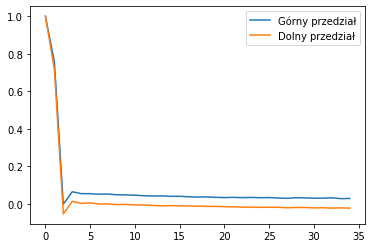

In [90]:
sns.lineplot(x=np.arange(len(up_quantail_pacf)), y=up_quantail_pacf,label="Górny przedział")
sns.lineplot(x=np.arange(len(down_quantail_pacf)), y=down_quantail_pacf,label="Dolny przedział")

In [104]:
df_acf_pcf =pd.DataFrame({"lag": np.arange(len(up_quantail_pacf)),
                            "up_acf":up_quantail_acf,
                             "down_acf":down_quantail_acf,
                             "up_pacf":up_quantail_pacf,
                             "down_pacf":down_quantail_pacf})

df_acf_pcf.to_csv("data/acf_pacf_data.csv",index=False)

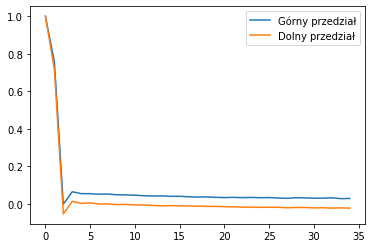

In [91]:
sns.lineplot(x=np.arange(len(up_quantail_acf)), y=up_quantail_acf,label="Górny przedział")
sns.lineplot(x=np.arange(len(down_quantail_acf)), y=down_quantail_acf,label="Dolny przedział")

In [111]:
quantail_samples_09 =np.apply_along_axis(np.quantile,1,samples,0.9)
quantail_samples_01 =np.apply_along_axis(np.quantile,1,samples,0.1)
quantail_samples_095 =np.apply_along_axis(np.quantile,1,samples,0.95)
quantail_samples_005 =np.apply_along_axis(np.quantile,1,samples,0.05)

In [112]:
df_sample_quantails = pd.DataFrame({"orginal": data["X"],
                                    "sample_09":quantail_samples_09,
                                    "sample_01":quantail_samples_01,
                                    "sample_095":quantail_samples_095,
                                    "sample_005":quantail_samples_005 })
df_sample_quantails.to_csv("data/samples_quantails.csv",index=False)

c:\Users\mkarc\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\mkarc\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\mkarc\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword 

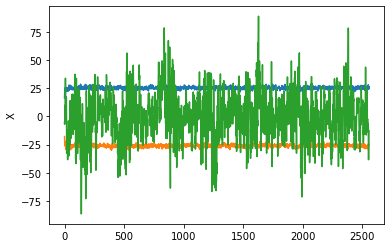

In [106]:
sns.lineplot(np.arange(len(data)), quantail_samples_09)
sns.lineplot(np.arange(len(data)), quantail_samples_01)
sns.lineplot(np.arange(len(data)), data["X"])

In [96]:
df = pd.DataFrame(model.resid,columns=["Residua"])
df.to_csv('data/residua.csv',index=False)

In [115]:
residua_acf = acf(model.resid)
residua_pacf = pacf(model.resid)


In [116]:
df_residua_acf_pacf = pd.DataFrame({"lag": np.arange(len(residua_acf)),
                                    "acf": residua_acf,
                                    "pacf": residua_pacf})
df_residua_acf_pacf.to_csv('data/residua_acf_pacf.csv',index=False)

In [117]:
df_residua_acf_pacf

,lag,acf,pacf
0,0,1.000000,1.000000
1,1,-0.000167,-0.000167
2,2,-0.004424,-0.004428
3,3,0.007418,0.007426
4,4,-0.011046,-0.011082
5,5,0.022180,0.022291
6,6,-0.005006,-0.005179
7,7,-0.011020,-0.010688
8,8,0.031198,0.030825
9,9,0.000279,0.000726
